In [1]:
%pylab inline
import scipy.integrate as integrate
from IPython.html.widgets import interact

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


# El Oscilador armonico.

Dibujamos el espacio de fases para la ecuacion $$\ddot{x} = -\omega^2x$$

Para eso lo pasamos a un sistema: 
 
$$
\begin{cases}
    \dot{V_{x}} = -\omega^2 x\\
    \dot{x} = V_{x}
\end{cases}
$$


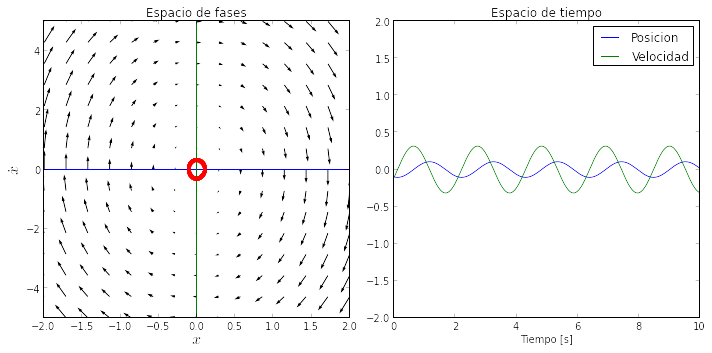

In [2]:

@interact(xin=(-5,5,0.1),yin=(-5,5,0.1))
def plotInt(xin,yin):
    xmax = 2
    vmax  = 5
    x = linspace(-xmax, xmax, 15) # Definimos el rango en el que se mueven las variables y el paso
    v = linspace(-vmax, vmax, 15)
    X, V = meshgrid(x,v) # Creamos una grilla con eso

    # Definimos las constantes
    w = 3


    # Definimos las ecuaciones
    Vp = -w**2*X
    Xp = V
    def resorte(y, t):
        yp = y[1]
        vp = -w**2*y[0]
        return [yp, vp]
    x0 = [xin, yin]
    t = linspace(0,10,2000)
    sh = integrate.odeint(resorte, x0, t)

    fig = figure(figsize(10,5))
    ax1 = subplot(121) # Hacer el grafico
    quiver(X, V, Xp, Vp, angles='xy')
    plot(x, [0]*len(x) ,[0]*len(v), v)
    lfase = plot(sh[:,0],sh[:,1],'.')
    ylim((-vmax,vmax))
    xlim((-xmax,xmax))

    # Retocarlo: tamanios, colores, leyendas, etc... 
    xlabel('$x$', fontsize=16)
    ylabel('$\\dot{x}$',fontsize=16)

    ax1.set_title('Espacio de fases')

    ax2 = subplot(122) # Hacer otro grafico
    lines = plot(t,sh )
    xlabel('Tiempo [s]')
    ax2.set_title('Espacio de tiempo')
    legend(['Posicion','Velocidad'])
    tight_layout()
    ylim((-xmax, xmax))



# El Pendulo

Dibujamos el espacio de fases para la ecuacion $$\ddot{\theta} = -\frac{g}{l}sin(\theta)$$

Para eso lo pasamos a un sistema: 
 
$$
\begin{cases}
    \dot{V_{\theta}} = -\frac{g}{l}sin(\theta)\\
    \dot{\theta} = V_{\theta}
\end{cases}
$$


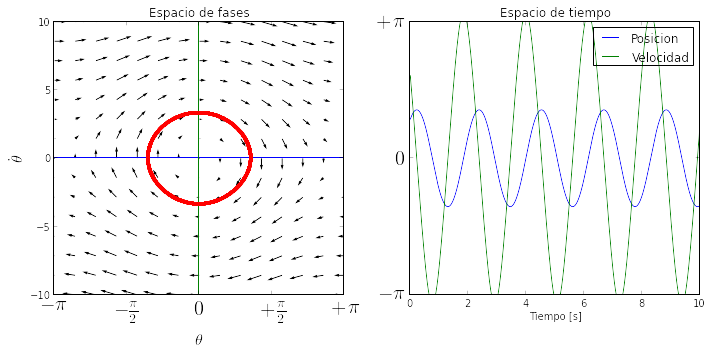

In [3]:
@interact(thI=(0,np.pi,0.1),vI=(0,5,0.1))
def plotInt(thI, vI):
    h = linspace(-pi,pi,15) # Definimos el rango en el que se mueven las variables y el paso
    v = linspace(-10,10,15)
    H, V = meshgrid(h,v) # Creamos una grilla con eso

    # Definimos las constantes
    g = 10
    l = 1

    # Definimos las ecuaciones
    Vp = -g/l*sin(H) 
    Hp = V
    def pendulo(y, t):
        hp = y[1]
        vp = -g/l*sin(y[0])
        return [hp, vp]
    y0 = [thI, vI]
    t = linspace(0,10,2000)
    sh = integrate.odeint(pendulo, y0, t)

    fig = figure(figsize(10,5))
    ax1 = subplot(121) # Hacer el grafico
    quiver(H, V, Hp, Vp, angles='xy')
    plot(h, [0]*len(h) ,[0]*len(v), v)
    lfase = plot(sh[:,0],sh[:,1],'.')

    # Retocarlo: tamanios, colores, leyendas, etc... 
    xlabel('$\\theta$', fontsize=16)
    ylabel('$\\dot{\\theta}$', fontsize=16)
    xlim((-pi,pi))
    ylim((-10,10))
    xtick = arange(-1,1.5,0.5)
    x_label = [ r"$-\pi$", 
               r"$-\frac{\pi}{2}$", r"$0$", 
               r"$+\frac{\pi}{2}$",   r"$+\pi$",
              ]
    ax1.set_xticks(xtick*pi)
    ax1.set_xticklabels(x_label, fontsize=20)
    ax1.set_title('Espacio de fases')

    ax2 = subplot(122) # Hacer otro grafico
    lines = plot(t,sh )
    ylim((-pi, pi))
    ytick = [-pi, 0, pi]
    y_label = [ r"$-\pi$", r"$0$", r"$+\pi$"]
    ax2.set_yticks(ytick)
    ax2.set_yticklabels(y_label, fontsize=20)
    xlabel('Tiempo [s]')
    ax2.set_title('Espacio de tiempo')
    legend(['Posicion','Velocidad'])
    tight_layout()

# El Pendulo con perdidas

Dibujamos el espacio de fases para la ecuacion $$\ddot{\theta} = -\frac{g}{l}sin(\theta) - \gamma \dot \theta$$

Para eso lo pasamos a un sistema: 
 
$$
\begin{cases}
    \dot{V_{\theta}} = -\frac{g}{l}sin(\theta) - \gamma \dot \theta\\
    \dot{\theta} = V_{\theta}
\end{cases}
$$


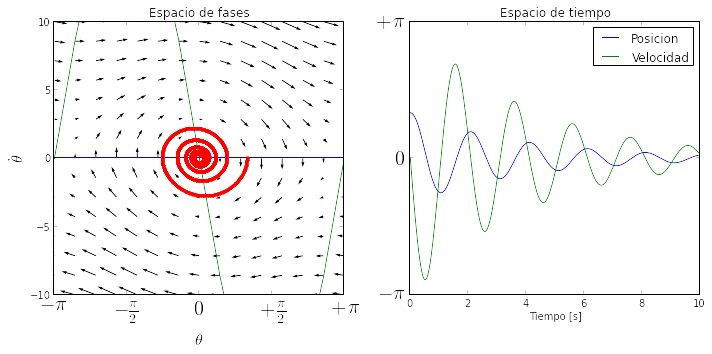

In [4]:
@interact(th0=(-2*np.pi,2*np.pi,0.1),v0=(-2,2,0.1))
def f(th0 = np.pi/3, v0 = 0):
    h = linspace(-pi,pi,15) # Definimos el rango en el que se mueven las variables y el paso
    v = linspace(-10,10,15)
    H, V = meshgrid(h,v) # Creamos una grilla con eso

    # Definimos las constantes
    g = 10
    l = 1
    ga = 0.5

    # Definimos las ecuaciones
    Vp = -g/l*sin(H) - ga*V  #SOLO CAMBIA ACA
    Hp = V 
    def pendulo(y, t):
        hp = y[1]
        vp = -g/l*sin(y[0]) - ga* y[1] # Y ACAA
        return [hp, vp]
    y0 = [th0, v0]
    t = linspace(0,10,2000)
    sh = integrate.odeint(pendulo, y0, t)

    fig = figure(figsize(10,5))
    ax1 = subplot(121) # Hacer el grafico
    quiver(H, V, Hp, Vp, angles='xy')
    plot(h, [0]*len(h) , h , -g/l/ga*sin(h))   #  Dibujar nulclinas
    lfase = plot(sh[:,0],sh[:,1],'.')

    # Retocarlo: tamanios, colores, leyendas, etc... 
    xlabel('$\\theta$', fontsize=16)
    ylabel('$\\dot{\\theta}$',fontsize=16)
    xlim((-pi,pi))
    ylim((-10,10))
    xtick = arange(-1,1.5,0.5)
    x_label = [ r"$-\pi$", 
               r"$-\frac{\pi}{2}$", r"$0$", 
               r"$+\frac{\pi}{2}$",   r"$+\pi$",
              ]
    ax1.set_xticks(xtick*pi)
    ax1.set_xticklabels(x_label, fontsize=20)
    ax1.set_title('Espacio de fases')

    ax2 = subplot(122) # Hacer otro grafico
    lines = plot(t,sh )
    ylim((-pi, pi))
    ytick = [-pi, 0, pi]
    y_label = [ r"$-\pi$", r"$0$", r"$+\pi$"]
    ax2.set_yticks(ytick)
    ax2.set_yticklabels(y_label, fontsize=20)
    xlabel('Tiempo [s]')
    ax2.set_title('Espacio de tiempo')
    legend(['Posicion','Velocidad'])
    tight_layout()

# El resorte Oscilaciones longitudinales.

Dibujamos el espacio de fases para la ecuacion $$\ddot{y} = -2\frac{k}{m}\left(1-\frac{l_0}{\sqrt{y^2+l^2}}\right)y$$

Para eso lo pasamos a un sistema: 
 
$$
\begin{cases}
    \dot{V_{y}} = -2\frac{k}{m}\left(1-\frac{l_0}{\sqrt{y^2+l^2}}\right)y\\
    \dot{y} = V_{y}
\end{cases}
$$


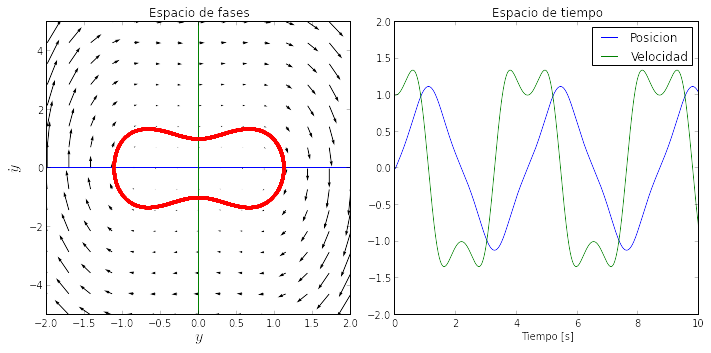

In [5]:
@interact(x0=(-1,1,0.1),v0=(0,1,0.1))
def f(x0=0,v0=1):
    ymax = 2
    vmax  = 5
    y = linspace(-ymax, ymax, 15) # Definimos el rango en el que se mueven las variables y el paso
    v = linspace(-vmax, vmax, 15)
    Y, V = meshgrid(y,v) # Creamos una grilla con eso

    # Definimos las constantes
    k = 10
    l = 1
    l0 = 1.2
    m = 1

    # Definimos las ecuaciones
    Vp = -2*k/m*(1-l0/(sqrt(Y**2+l**2)))*Y 
    Yp = V
    def resorte(y, t):
        yp = y[1]
        vp = -2*k/m*(1-l0/(sqrt(y[0]**2+l**2)))*y[0] 
        return [yp, vp]
    y0 = [x0, v0]
    t = linspace(0,10,2000)
    sh = integrate.odeint(resorte, y0, t)

    fig = figure(figsize(10,5))
    ax1 = subplot(121) # Hacer el grafico
    quiver(Y, V, Yp, Vp, angles='xy')
    plot(y, [0]*len(y) ,[0]*len(v), v)
    lfase = plot(sh[:,0],sh[:,1],'.')
    ylim((-vmax,vmax))
    xlim((-ymax,ymax))

    # Retocarlo: tamanios, colores, leyendas, etc... 
    xlabel('$y$', fontsize=16)
    ylabel('$\\dot{y}$', fontsize=16)

    ax1.set_title('Espacio de fases')

    ax2 = subplot(122) # Hacer otro grafico
    lines = plot(t,sh )
    xlabel('Tiempo [s]')
    ax2.set_title('Espacio de tiempo')
    legend(['Posicion','Velocidad'])
    tight_layout()
    ylim((-ymax, ymax))